# Analysis for normal salaries

## Questions

- How does the salaries vary from different experience levels?
- If outliers, what's the context? What is the expectation of jobs with higher salaries?

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('normal_salaries.csv', index_col=0)

df.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2024,Intermediate,FT,Data Science,75000,US,Fully remote,US,M
1,2024,Intermediate,FT,Data Science,55000,US,Fully remote,US,M
2,2024,Executive,FT,Data Engineer,253900,US,In person,US,M
3,2024,Executive,FT,Data Engineer,145100,US,In person,US,M
4,2024,Intermediate,FT,Research Scientist,138000,US,In person,US,M


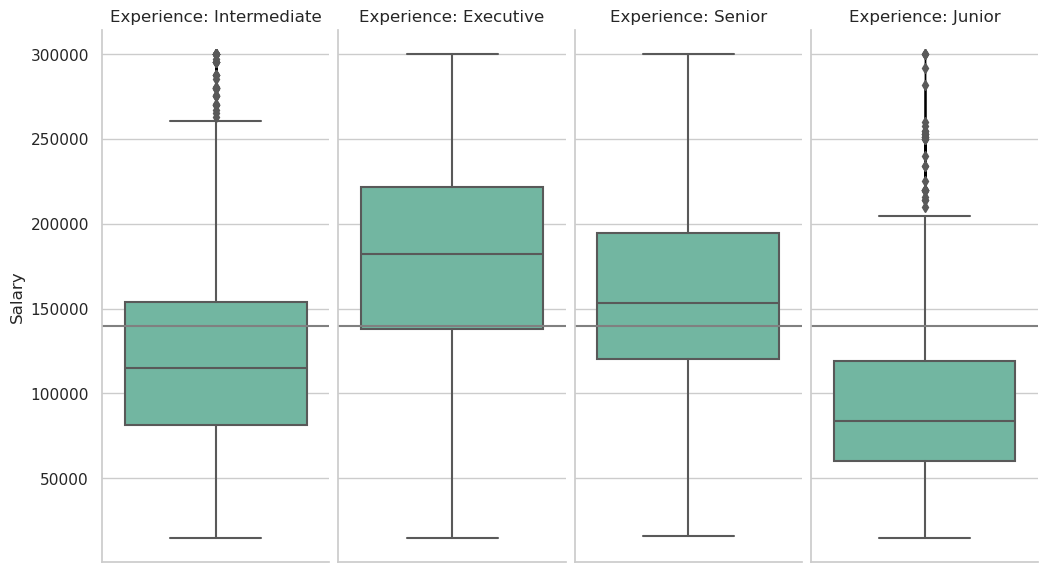

In [50]:
palette = "Set2"  

cat_plot = sns.catplot(y='salary', data=df, kind='box', col='experience_level', palette=palette)

for ax in cat_plot.axes.flat:
    ax.axhline(df['salary'].median(), color='gray', linestyle='--', linewidth=1.5)

cat_plot.set_titles("Experience: {col_name}")

cat_plot.set_axis_labels("", "Salary")

for ax in cat_plot.axes.flat:
    for line in ax.lines:
        line.set_linestyle('-')

cat_plot.fig.set_size_inches(10, 6)


plt.show()

In [51]:
salary_means = df.groupby('experience_level')['salary'].mean().reset_index()
salary_means

,experience_level,salary
0,Executive,181891.756501
1,Intermediate,122723.192973
2,Junior,93234.436207
3,Senior,158732.243488


In [52]:
from scipy.stats import kruskal

# Hipótesis: El salario medio aumenta conforme aumenta el nivel de experiencia
# Hipótesis nula: Los salarios no aumentan conforme aumenta el nivel de experiencia

group_junior = df[df['experience_level'] == 'Junior']['salary']
group_intermediate = df[df['experience_level'] == 'Intermediate']['salary']
group_senior = df[df['experience_level'] == 'Senior']['salary']
group_executive = df[df['experience_level'] == 'Executive']['salary']

kruskal_result = kruskal(group_junior, group_intermediate, group_senior, group_executive)

# Se rechaza la hipótesis nula, la media de salarios no es por casualidad
kruskal_result

KruskalResult(statistic=2296.615895950252, pvalue=0.0)

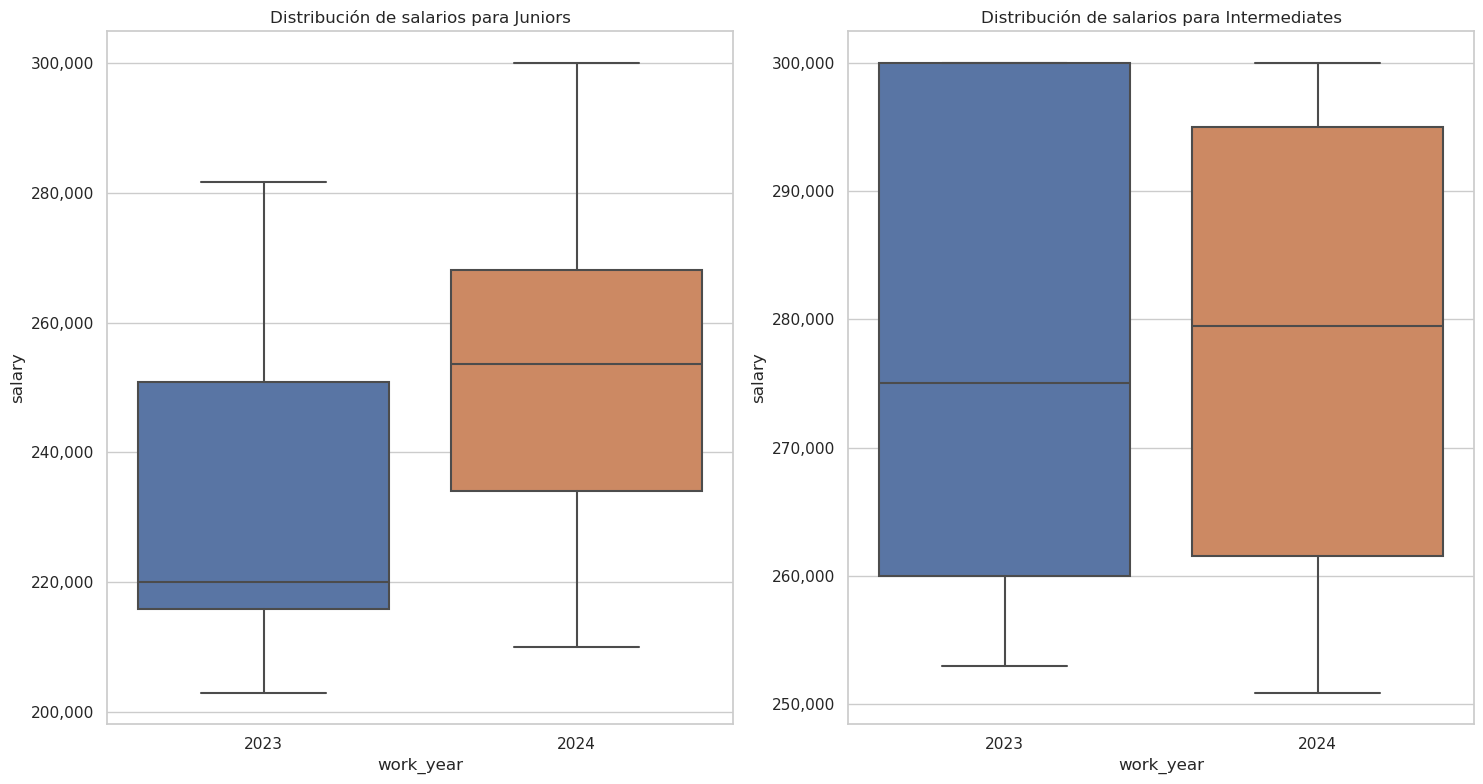

In [53]:
import matplotlib.ticker as ticker


# outliers junior salarios mayores a 200000
juniors_outl = df[(df['experience_level'] == 'Junior') & (df['salary'] > 200000)]

# outliers intermediate salarios mayores a 250000
intermediate_outl = df[(df['experience_level'] == 'Intermediate') & (df['salary'] > 250000)]

# armar dataset con el complemento de los outliers
df_no_outl = df[~df.index.isin(juniors_outl.index) & ~df.index.isin(intermediate_outl.index)]

juniors_outl_filtered = juniors_outl[~juniors_outl['work_year'].isin([2020, 2022])]
intermediate_outl_filtered = intermediate_outl[~intermediate_outl['work_year'].isin([2020, 2022])]

sns.set(style="whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

sns.boxplot(
    x='work_year',
    y='salary',
    data=juniors_outl_filtered,
    ax=ax[0]
)
ax[0].set_title('Distribución de salarios para Juniors')
ax[0].xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax[0].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

sns.boxplot(
    x='work_year',
    y='salary',
    data=intermediate_outl_filtered,
    ax=ax[1]
)
ax[1].set_title('Distribución de salarios para Intermediates')
ax[1].xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.setp(ax, xticks=[0, 1], xticklabels=['2023', '2024'])
plt.tight_layout()

plt.show()


/home/porto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/porto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


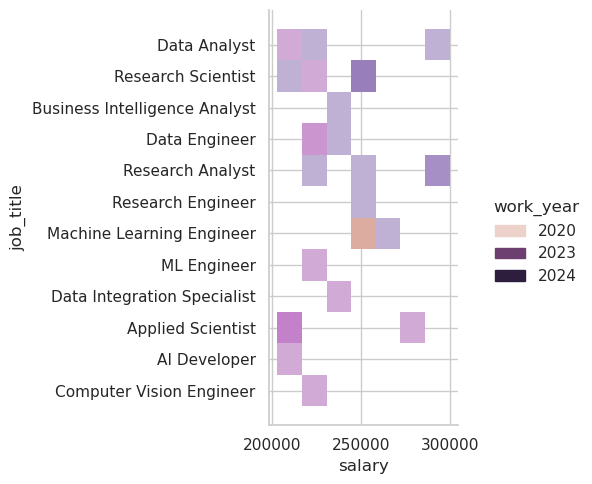

In [54]:
sns.displot(y='job_title', x='salary', data=juniors_outl, hue='work_year')
plt.show()

/home/porto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/porto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


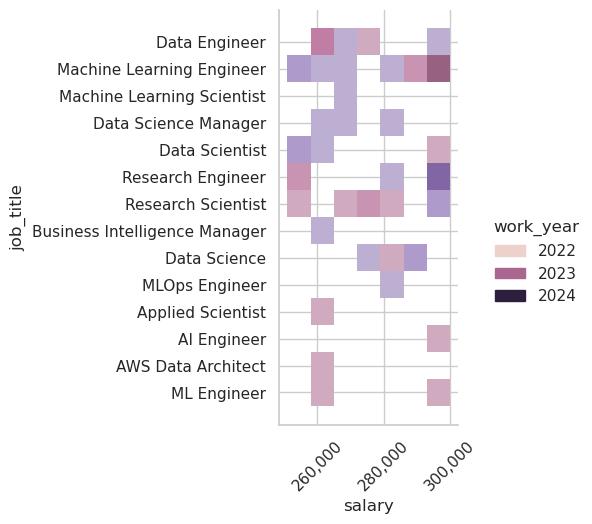

In [55]:
import matplotlib.ticker as ticker

sns.displot(y='job_title', x='salary', data=intermediate_outl, hue='work_year')

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.xticks(rotation=45)

plt.show()

- Company size impacts the salary of the top 10 jobs?

/home/porto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


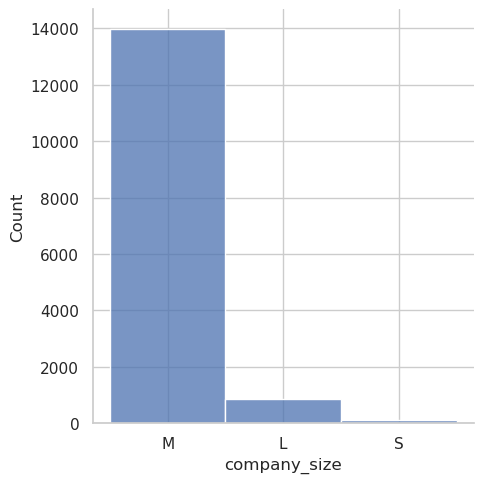

In [77]:
sns.displot(x='company_size', data=df_no_outl)
plt.show()

/home/porto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


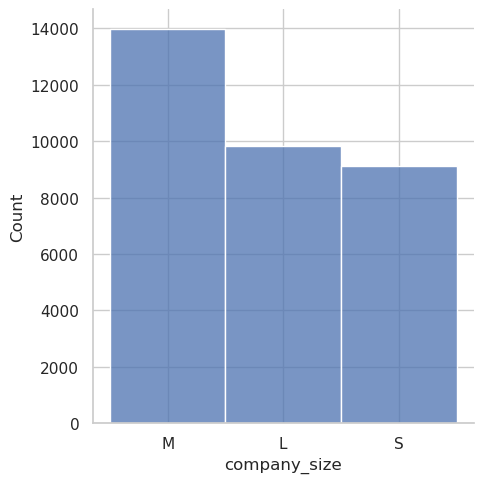

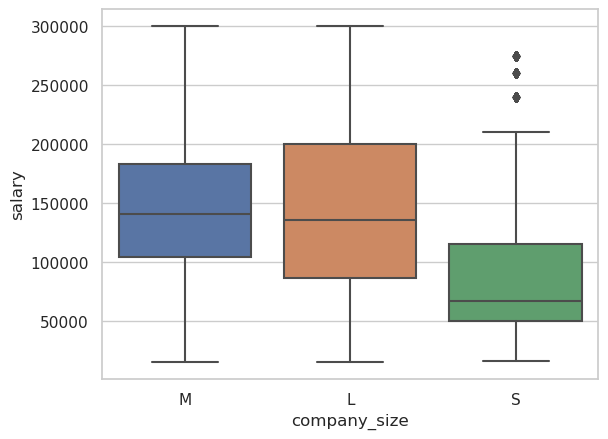

In [78]:
# El company_size afecta el salario de los puestos de trabajo?
# Hipótesis: El tamaño de la empresa afecta el salario de los puestos de trabajo
# Hipótesis nula: El tamaño de la empresa no afecta el salario de los puestos de trabajo

# Sobremuestreo para la clase large, para tener un dataset balanceado
df_large = df_no_outl[df_no_outl['company_size'] == 'L']
df_medium = df_no_outl[df_no_outl['company_size'] == 'M']
df_small = df_no_outl[df_no_outl['company_size'] == 'S']

df_large_oversampled = df_large.sample(9000, replace=True)
df_small_oversampled = df_small.sample(9000, replace=True)

df_balanced = pd.concat([df_no_outl, df_large_oversampled, df_small_oversampled])

sns.displot(x='company_size', data=df_balanced)
plt.show()

sns.boxplot(x='company_size', y='salary', data=df_balanced)
plt.show()


In [83]:
# Prueba de hipótesis para saber si el tamaño de la empresa afecta el salario
# se usa la prueba de tukey para comparar los salarios entre los diferentes tamaños de empresa
# Hipótesis: El tamaño de la empresa afecta el salario
# Hipótesis nula: El tamaño de la empresa no afecta el salario
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_result = pairwise_tukeyhsd(df_balanced['salary'], df_balanced['company_size'])

print(tukey_result)



     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
     L      M   5507.6194   0.0   3678.4555   7336.7833   True
     L      S -52351.0809   0.0 -54371.8105 -50330.3514   True
     M      S -57858.7003   0.0  -59729.928 -55987.4726   True
--------------------------------------------------------------


In [74]:
# Que nivel de experiencia es mas afectado salarialmente por el tamaño de la empresa?
# Hipótesis: El tamaño de la empresa afecta el salario de los puestos de trabajo de nivel Junior
# Hipótesis nula: El tamaño de la empresa no afecta el salario de los puestos de trabajo de nivel Junior

group_large_junior = df_balanced[(df_balanced['company_size'] == 'L') & (df_balanced['experience_level'] == 'Junior')]['salary']
group_medium_junior = df_balanced[(df_balanced['company_size'] == 'M') & (df_balanced['experience_level'] == 'Junior')]['salary']
group_small_junior = df_balanced[(df_balanced['company_size'] == 'S') & (df_balanced['experience_level'] == 'Junior')]['salary']

kruskal_result = kruskal(group_large_junior, group_medium_junior, group_small_junior)
kruskal_result
# valor p = 1.56e-76, se rechaza la hipótesis nula
# El tamaño de la empresa afecta el salario de los puestos de trabajo de nivel Junior

# Hipótesis: El tamaño de la empresa afecta el salario de los puestos de trabajo de nivel Intermediate
# Hipótesis nula: El tamaño de la empresa no afecta el salario de los puestos de trabajo de nivel Intermediate

group_large_intermediate = df_balanced[(df_balanced['company_size'] == 'L') & (df_balanced['experience_level'] == 'Intermediate')]['salary']
group_medium_intermediate = df_balanced[(df_balanced['company_size'] == 'M') & (df_balanced['experience_level'] == 'Intermediate')]['salary']
group_small_intermediate = df_balanced[(df_balanced['company_size'] == 'S') & (df_balanced['experience_level'] == 'Intermediate')]['salary']

kruskal_result = kruskal(group_large_intermediate, group_medium_intermediate, group_small_intermediate)
kruskal_result

# p_value = 0, se rechaza la hipótesis nula
# El tamaño de la empresa afecta el salario de los puestos de trabajo de nivel Intermediate

# Hipótesis: El tamaño de la empresa afecta el salario de los puestos de trabajo de nivel Senior
# Hipótesis nula: El tamaño de la empresa no afecta el salario de los puestos de trabajo de nivel Senior

group_large_senior = df_balanced[(df_balanced['company_size'] == 'L') & (df_balanced['experience_level'] == 'Senior')]['salary']
group_medium_senior = df_balanced[(df_balanced['company_size'] == 'M') & (df_balanced['experience_level'] == 'Senior')]['salary']
group_small_senior = df_balanced[(df_balanced['company_size'] == 'S') & (df_balanced['experience_level'] == 'Senior')]['salary']

kruskal_result = kruskal(group_large_senior, group_medium_senior, group_small_senior)
kruskal_result
# p_value = 0, se rechaza la hipótesis nula
# El tamaño de la empresa afecta el salario de los puestos de trabajo de nivel Senior

# Hipótesis: El tamaño de la empresa afecta el salario de los puestos de trabajo de nivel Executive
# Hipótesis nula: El tamaño de la empresa no afecta el salario de los puestos de trabajo de nivel Executive

group_large_executive = df_balanced[(df_balanced['company_size'] == 'L') & (df_balanced['experience_level'] == 'Executive')]['salary']
group_medium_executive = df_balanced[(df_balanced['company_size'] == 'M') & (df_balanced['experience_level'] == 'Executive')]['salary']
group_small_executive = df_balanced[(df_balanced['company_size'] == 'S') & (df_balanced['experience_level'] == 'Executive')]['salary']

kruskal_result = kruskal(group_large_executive, group_medium_executive, group_small_executive)
kruskal_result
# p valie = 2.25e-24, se rechaza la hipótesis nula
# El tamaño de la empresa afecta el salario de los puestos de trabajo de nivel Executive

KruskalResult(statistic=82.9784622999561, pvalue=9.581993086090118e-19)

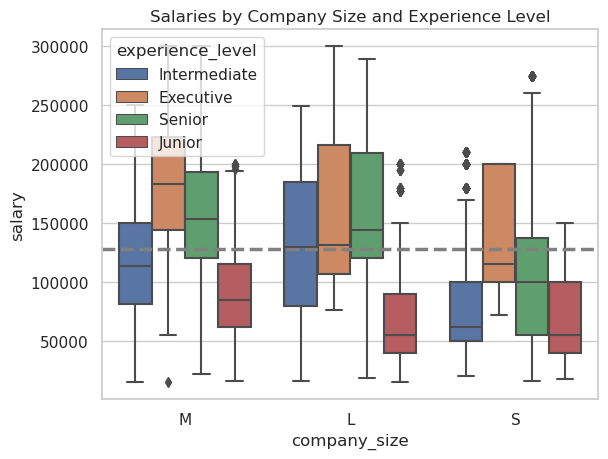

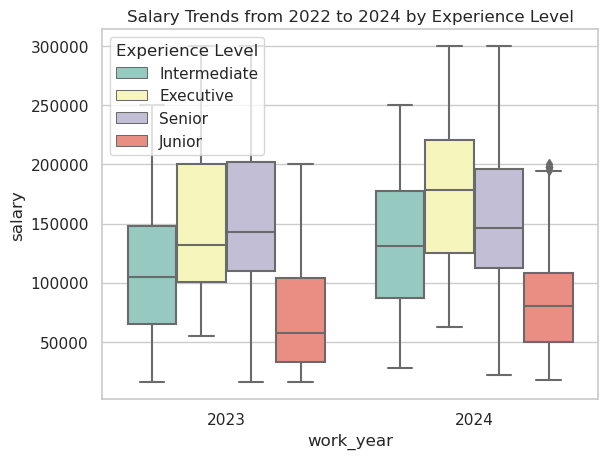

In [103]:
sns.boxplot(x='company_size', y='salary', data=df_balanced, hue='experience_level')
plt.title('Salaries by Company Size and Experience Level')
plt.axhline(df_balanced['salary'].mean(), color='gray', linestyle='--', linewidth=2.5)
plt.show()

# work_year solo 2022, 2023 y 2024
work_year_list = [2023, 2024]

sns.boxplot(x='work_year', y='salary', data=df_balanced[df_balanced['work_year'].isin(work_year_list)], hue='experience_level', palette='Set3')
plt.title('Salary Trends from 2022 to 2024 by Experience Level')
plt.legend(title='Experience Level', loc='upper left')
plt.show()


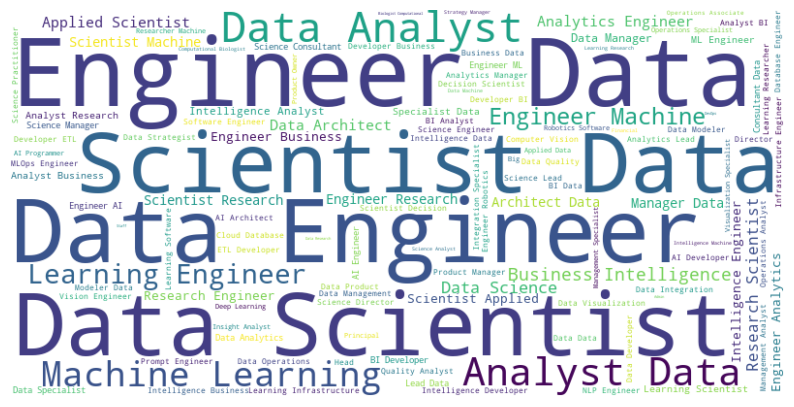

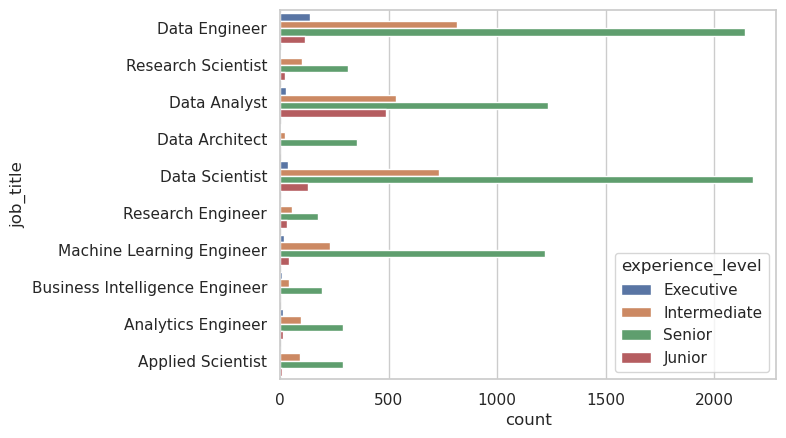

In [76]:
# Nube de palabras con los job_title para observar cuales son los mas comunes
from wordcloud import WordCloud

job_titles = df_no_outl['job_title'].str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_titles)

plt.figure(figsize=(10, 6))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.show()

# Analizar el nivel de experiencia mas comun entre el top 10 de job_titles
top_10_job_titles = df_no_outl['job_title'].value_counts().head(10).index

df_top_10 = df_no_outl[df_no_outl['job_title'].isin(top_10_job_titles)]

sns.countplot(y='job_title', hue='experience_level', data=df_top_10)
plt.show()

<Axes: xlabel='salary', ylabel='job_title'>

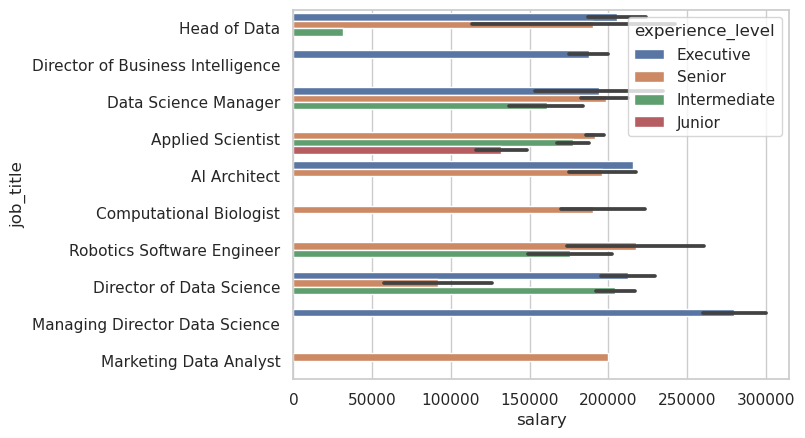

In [123]:
# Que job_titles son los que tienen los salarios mas altos, agrupados por experience_level, only top 10
top_10_job_titles = df_no_outl['salary'].groupby(df_no_outl['job_title']).mean().sort_values(ascending=False).head(10).index

df_top_10 = df_no_outl[df_no_outl['job_title'].isin(top_10_job_titles)]

sns.barplot(y='job_title', x='salary', data=df_top_10, hue='experience_level')

